In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = np.fromfile("/home/jbm/raw_audio", dtype=float32)
x.shape, x.dtype

((3040256,), dtype('float32'))

In [15]:
Fs = 24000
symbol_rate = 5 # symbols per second

In [51]:
symbol_freqs = [200,300,500,700, 1100, 1300,1700, 1900]
nfft=4096

symbol_bins = [(f*nfft)/Fs for f in symbol_freqs]
bin_span = 1 # +/- center bin
zip(symbol_freqs, symbol_bins)

[(200, 34),
 (300, 51),
 (500, 85),
 (700, 119),
 (1100, 187),
 (1300, 221),
 (1700, 290),
 (1900, 324)]

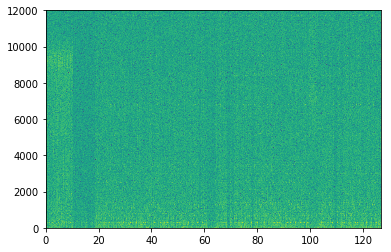

In [12]:
specgram(x[::], Fs=Fs, NFFT=nfft);
#ylim(0,2000);

In [13]:
xp = x[80*Fs:100*Fs]
len(xp)

480000

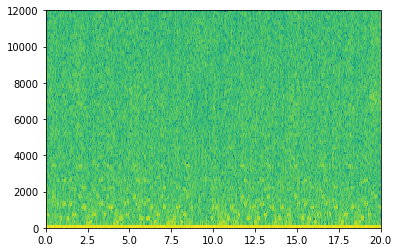

In [14]:
specgram(xp, Fs=Fs);

In [17]:
oversample = 3
noverlap = nfft - (Fs/symbol_rate/oversample)
noverlap

2496

In [19]:
Pxx, freqs, bins = matplotlib.mlab.specgram(xp, Fs=Fs, NFFT=nfft, noverlap=noverlap);
Pxx.shape

(2049, 298)

(100, 150)

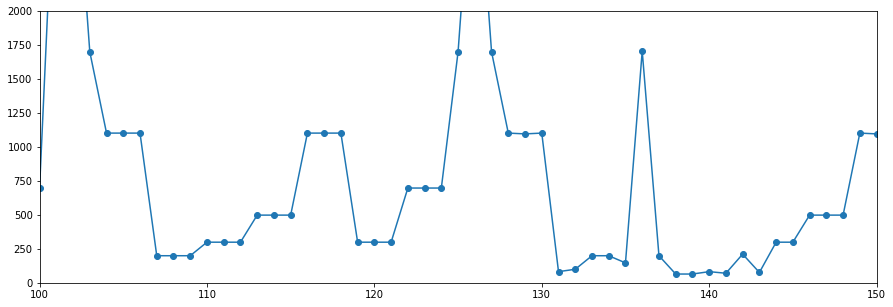

In [24]:
figure(figsize=(15,5))
plot(freqs[10+argmax(Pxx[10:], axis=0)], 'o-')
ylim(0,2000);
xlim(100,150)

In [53]:
bin_values = {}
for f,b_f in zip(symbol_freqs, symbol_bins):
    bin_values[f] = np.sum(Pxx[(b_f-bin_span):(b_f+bin_span)], axis=0)
    
# plot(bin_values[300])

pows = np.array([bin_values[f] for f in symbol_freqs])
pows.shape

(8, 298)

(8, 99)
1 (8, 99)
1
1
2 (8, 99)
2
0


(8, 99)

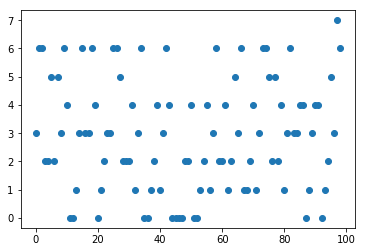

In [54]:
i0 = 0
pows_agg = pows[:,i0:-(oversample-1):oversample]
print pows_agg.shape
for j in range(1,oversample):
    print j, pows_agg.shape
    print i0+j
    print (oversample-(j+1))
    pows_agg += pows[:, (i0+j):pows.shape[1]-1-(oversample-(j+1)):oversample]
    
plot(np.argmax(pows_agg, axis=0), 'o')
pows_agg.shape

In [55]:
def _overlay(symbols):
    bits = []
    b1 = 0
    b0 = 0
    
    for s in symbols:
        b1 += s & 4
        b0 += s & 2
        
        bits.append(1 if b1 > 0 else 0)
        b1 = b0
        b0 = s & 1
        
    return bits

In [57]:
bitses = _overlay(np.argmax(pows_agg, axis=0))

In [58]:
def _bit_chr(a):
    c = np.sum([a[i]*2**i for i in range(8)])
    if c > 127:
        return '~'
    if c < 0x20:
        return '_'
    return chr(c)

In [62]:
len(bitses)

99

In [64]:
for i in range(8):
    print "".join([ _bit_chr(bitses[j:j+9]) for j in range(i, len(bitses)-8, 8) ])

~~~~~_~<m~|~
_~~wF_C~6W>F
~~~;#~!O~+_~
~~~~~~~~~~~
k~~~~`~~~~~
5||gd0~is~c
_>~32_~~~~1
__~___y~\~_
